# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Autocorrelation Lab

Week 9 | Lab 2.3

## Introduction

Now that we've mastered analysing changes over time, let's put our new knowledge to use. Everyone knows the stock market is one way to make- or lose- a lot of money. Using the power of time series analysis, let's take a look at a few stocks and see what we can learn.

A firm has offered to let you manage their portfolio, but they want to know that you can deliver. They've requested that you provide a report to them on at least 5 different publicly traded companies describing the trends you've observed. It's up to you to decide which industries to investigate. Prepare a notebook with your findings to present your results.


## Exercise

#### Requirements

- Select a minimum of 5 companies to investigate
- Find stock data that can be exported (See below for details)
- Using trend lines, autocorrelation, and windowing functions, analyze the stock changes over time
- Present your findings with explanations in a jupyter notebook

#### Exporting Stock Data

You can visit any company's summary page (e.g., http://finance.google.com/finance?q=nasdaq:goog) to export data. Even easier, by appending any stock symbol (see e.g. https://en.wikipedia.org/wiki/Ticker_symbol for some examples) to the end of the following URL, you can download a CSV file describing a time series of stock quotes. So go to that wikipedia page to find the stock symbols for these companies and/or any others you are interested in studying: `ATandT,Citigroup,Ford,USSteelCorp,Visa,goog,ibm,kelloggs,msft,yhoo`.

> http://www.google.com/finance/historical?output=csv&q=

**NOTE:** Try opening the spreadsheet in your favorite text editor prior to loading into pandas

Load the time series into `pandas` and do your analysis on the resulting DataFrame. Use your notes from the Autocorrelation lesson to use **trend lines**, **autocorrelation**, and **windowing/differencing functions** to complete this lab.

**Bonus:**
- By grouping together multiple stocks, you can get an index on a specific industry. Give insights on an industry level, as well as a company level.
- Correlate the different stocks to see which stocks can be used as an index for others.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
%matplotlib inline

#### Put some stock market datafiles into a directory and get the filenames from the directory (adjust your path)

In [2]:
file_list = !ls datasets/stocks/* 

In [3]:
[f[16:-8] for f in file_list]

['ATandT',
 'Citigroup',
 'Ford',
 'USSteelCorp',
 'Visa',
 'goog',
 'ibm',
 'kelloggs',
 'msft',
 'yhoo']

#### Create dictionary with stock prices for all companies

In [4]:
my_stocks = {}
for name in file_list:
    data = pd.read_csv(name)
    data = data.rename(columns={data.columns[0]:'date'})
    data.date = pd.to_datetime(data.date)
    data.set_index(data.date,inplace=True)
    data = data.iloc[:,1:]
    data.sort_index(inplace=True)
    data['Mean'] = (data.High+data.Low)*0.5
    my_stocks[name[16:-8]] = data

In [5]:
my_stocks.keys()

['goog',
 'kelloggs',
 'ibm',
 'Ford',
 'Visa',
 'ATandT',
 'msft',
 'yhoo',
 'Citigroup',
 'USSteelCorp']

In [6]:
my_stocks['ibm'].head()

,Open,High,Low,Close,Volume,Mean
date,,,,,,
2015-12-07,140.16,140.41,138.81,139.55,3279376,139.610
2015-12-08,138.28,139.06,137.53,138.05,3905155,138.295
2015-12-09,137.38,139.84,136.23,136.61,4614993,138.035
2015-12-10,137.03,137.85,135.72,136.78,4222329,136.785
2015-12-11,135.23,135.44,133.91,134.57,5333767,134.675


In [7]:
colors = ['b','r','g','k','y','r','b']

#### Plot daily mean price, monthly means and rolling means for IBM

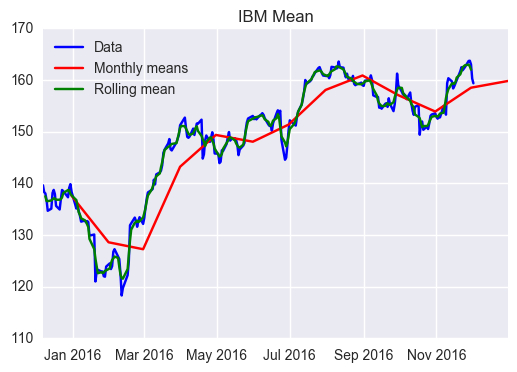

In [8]:
col = 'Mean'
data = my_stocks['ibm']
plt.plot(data[col].index,
         data[col],label='Data',c='b')
plt.plot(data[col].resample('M').mean().index,
         data[col].resample('M').mean(),label='Monthly means',c='r')
plt.plot(data[col].index,
         data[col].rolling( window=5, center=True).mean(),
         label='Rolling mean',c='g')
plt.legend(loc='upper left')
plt.title('IBM Mean')
plt.show()

#### Plot daily mean volume, monthly means and rolling means for IBM

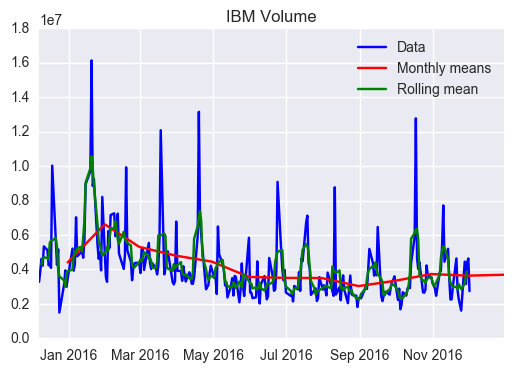

In [9]:
col = 'Volume'
plt.plot(data[col].index,
         data[col],label='Data',c='b')
plt.plot(data[col].resample('M').mean().index,
         data[col].resample('M').mean(),label='Monthly means',c='r')
plt.plot(data[col].index,
         data[col].rolling( window=5, center=True).mean(),
         label='Rolling mean',c='g')
plt.legend(loc='upper right')
plt.title('IBM Volume')
plt.show()

#### Plot price evolution for all stocks

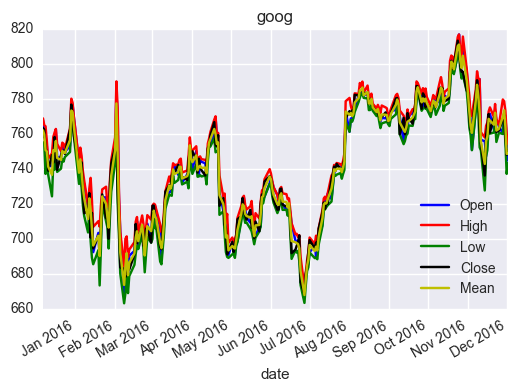

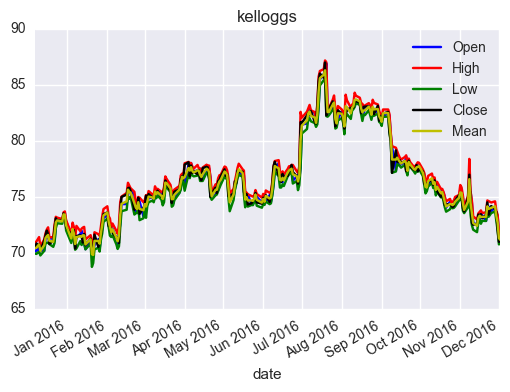

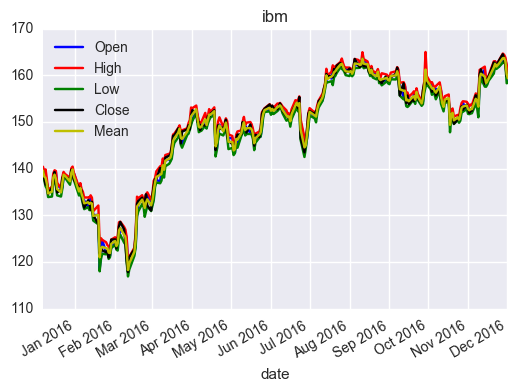

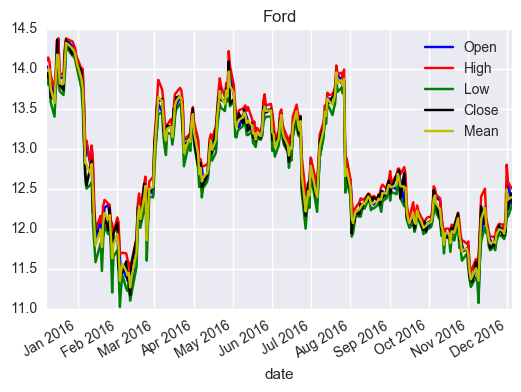

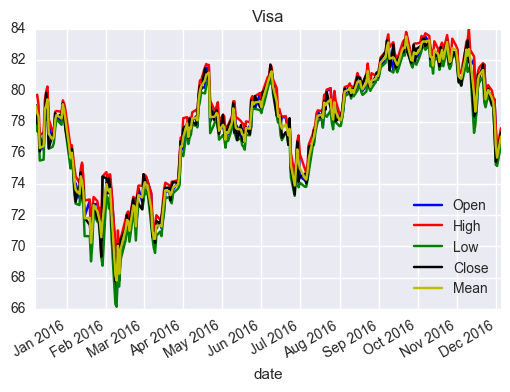

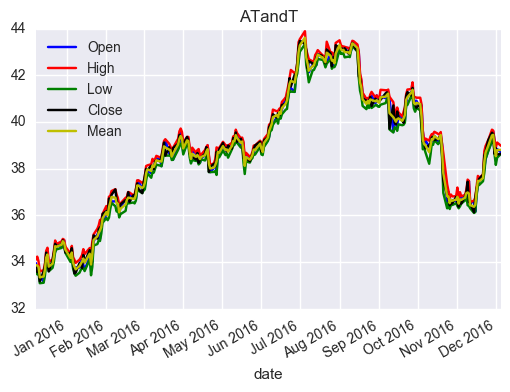

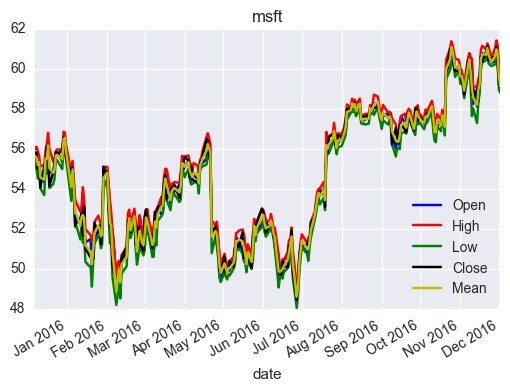

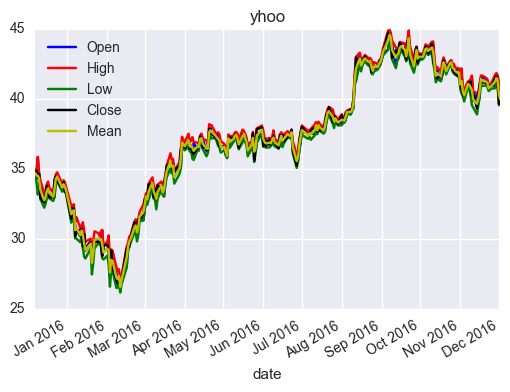

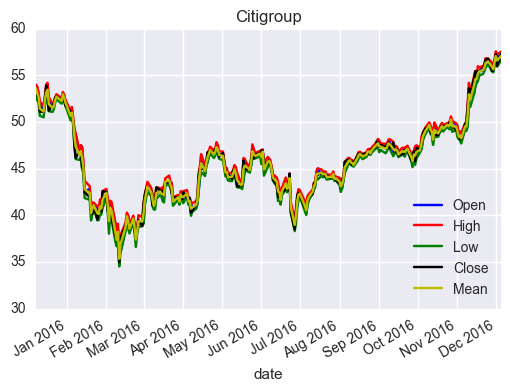

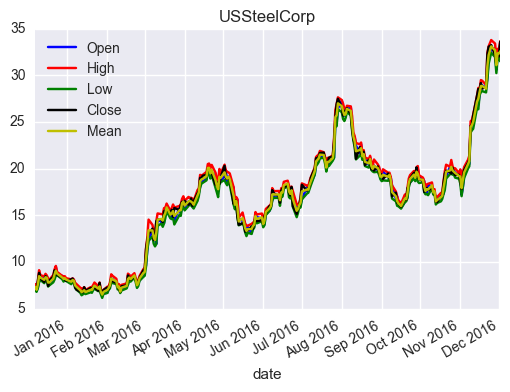

In [10]:
prices = [col for col in my_stocks['Visa'].columns if col!='Volume']
for name in my_stocks.keys():
    data = my_stocks[name]
    data[prices].rolling( window=1, center=True).mean().plot(color=colors)
    plt.title(name)

#### Create dataframes containing only daily mean prices and volume for all companies

In [11]:
data_m = my_stocks[my_stocks.keys()[0]][['Mean']]
data_m = data_m.rename(columns={'Mean':my_stocks.keys()[0]});

for i in range(1,len(my_stocks.keys())):
    data_m = data_m.merge(my_stocks[my_stocks.keys()[i]][['Mean']],
                 left_index='date',right_index='date',how='outer')
    data_m = data_m.rename(columns={'Mean':my_stocks.keys()[i]})

In [12]:
data_V = my_stocks[my_stocks.keys()[0]][['Volume']]
data_V = data_V.rename(columns={'Volume':my_stocks.keys()[0]});

for i in range(1,len(my_stocks.keys())):
    data_V = data_V.merge(my_stocks[my_stocks.keys()[i]][['Volume']],
                 left_index='date',right_index='date',how='outer')
    data_V = data_V.rename(columns={'Volume':my_stocks.keys()[i]})

In [13]:
data_m.dropna(inplace=True)
data_V.dropna(inplace=True)

#### Plot daily mean price and monthly means for all companies

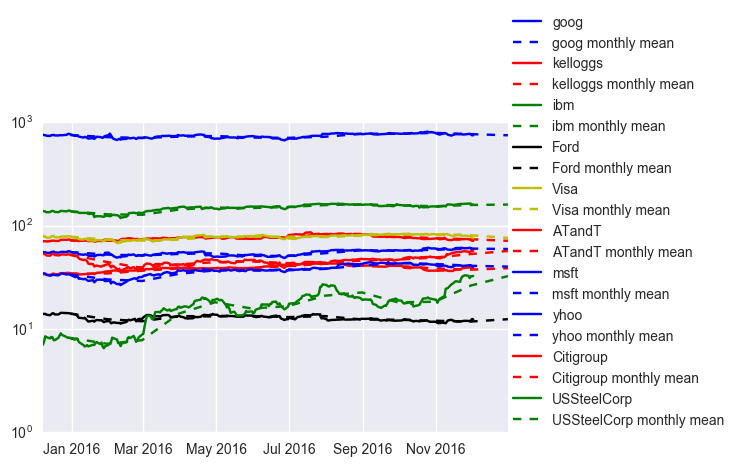

In [14]:
i = 0
for key in my_stocks.keys()[:]:
    plt.plot(data_m.rolling( window=1, center=True).mean().index,
         data_m[key].rolling( window=1, center=True).mean(),colors[i])
    plt.plot(data_m.resample('M').mean().index,
         data_m[key].resample('M').mean(),colors[i]+'--',label = key+' monthly mean')
    i += 1
    i = i%len(colors)
plt.legend(loc=[1,0])
plt.yscale('log')

#### Calculate and plot the autocorrelations for increasing number of lags for daily mean price and volume

In [15]:
def func_auto(data):
    data_auto = []
    for i in range(len(data)-1):
        current = []
        for col in data.columns:
            current.append(data[col].autocorr(lag=i))
        data_auto.append(current)
    return pd.DataFrame(data_auto,columns=data.columns)

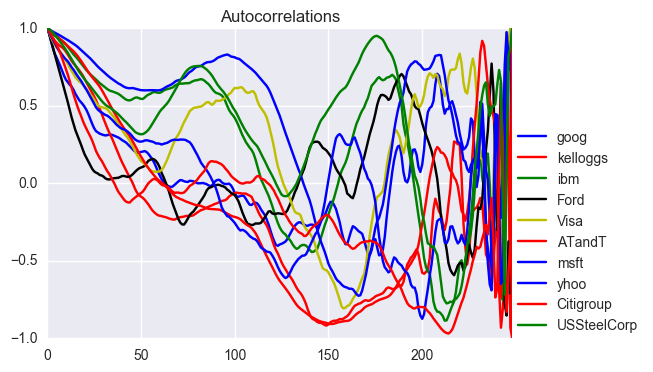

In [16]:
func_auto(data_m).plot(color=colors)
plt.title('Autocorrelations')
plt.legend(loc=[1,0])
plt.show()

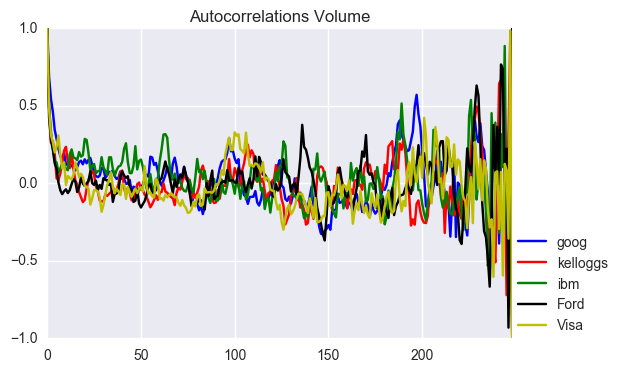

In [17]:
func_auto(data_V.iloc[:,:5]).plot(color=colors)
plt.title('Autocorrelations Volume')
plt.legend(loc=[1,0])
plt.show()

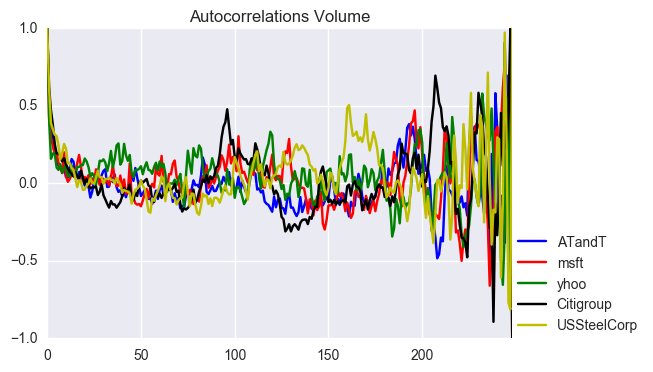

In [18]:
func_auto(data_V.iloc[:,5:]).plot(color=colors)
plt.title('Autocorrelations Volume')
plt.legend(loc=[1,0])
plt.show()

##### Mean price differences for all companies

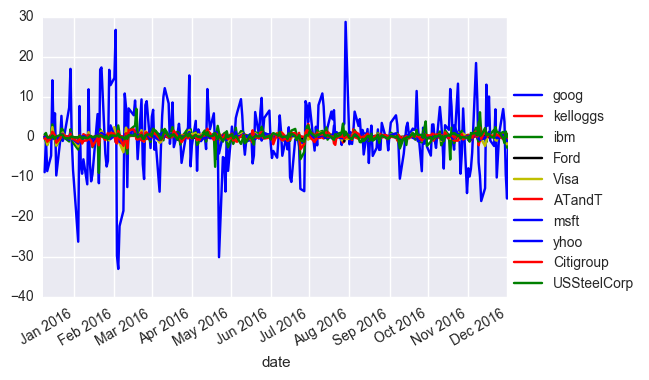

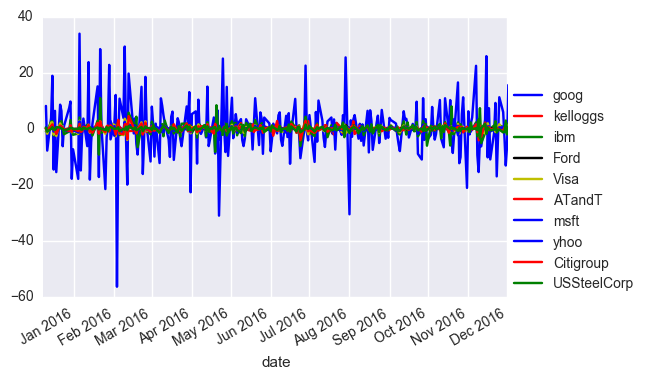

In [19]:
data_m.diff(periods=1).plot(color=colors)
plt.legend(loc=[1,0])
data_m.diff(periods=1).diff(periods=1).plot(color=colors)
plt.legend(loc=[1,0])
plt.show()

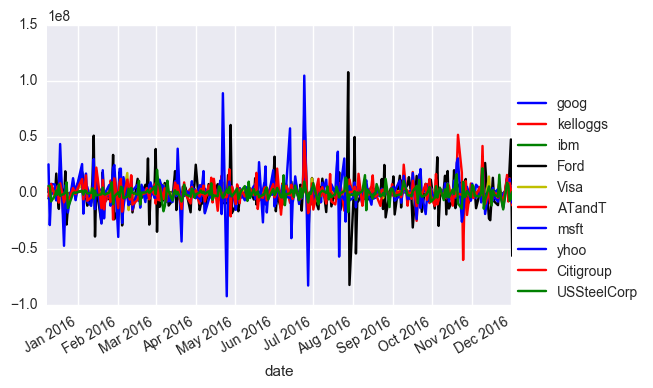

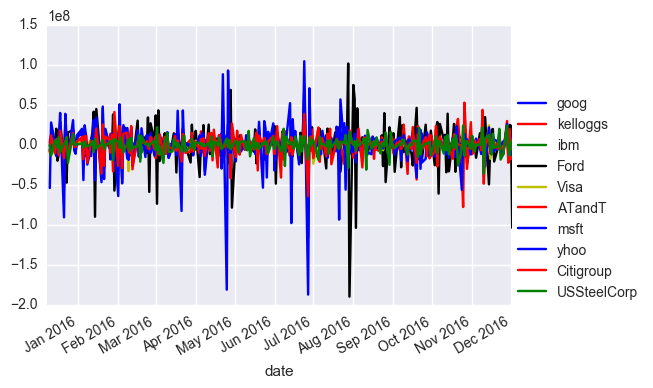

In [20]:
data_V.diff(periods=1).plot(color=colors)
plt.legend(loc=[1,0])
data_V.diff(periods=1).diff(periods=1).plot(color=colors)
plt.legend(loc=[1,0])
plt.show()

#### Create a dataframe for IT companies and calculate industry mean

In [21]:
data_IT = pd.DataFrame({'goog':my_stocks['goog'].Mean,
                        'msft':my_stocks['msft'].Mean,
                        'yhoo':my_stocks['yhoo'].Mean,
                        'ibm':my_stocks['ibm'].Mean})

In [22]:
data_IT['Mean'] = data_IT.mean(axis=1)
data_IT.head()

,goog,ibm,msft,yhoo,Mean
date,,,,,
2015-12-07,761.910,139.610,55.630,34.695,247.96125
2015-12-08,759.500,138.295,55.545,34.505,246.96125
2015-12-09,750.615,138.035,55.190,34.495,244.58375
2015-12-10,749.840,136.785,55.335,34.320,244.07000
2015-12-11,741.230,134.675,54.555,33.485,240.98625


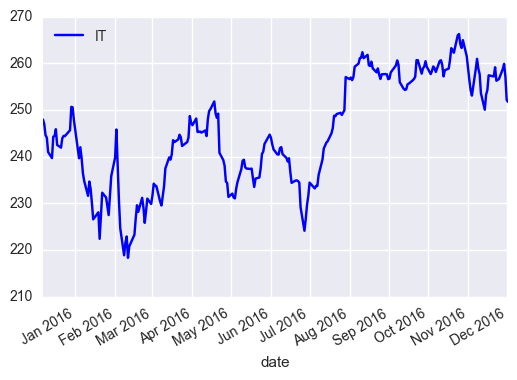

In [23]:
data_IT.Mean.plot(color='b',label='IT')
plt.legend(loc='upper left')
plt.show()

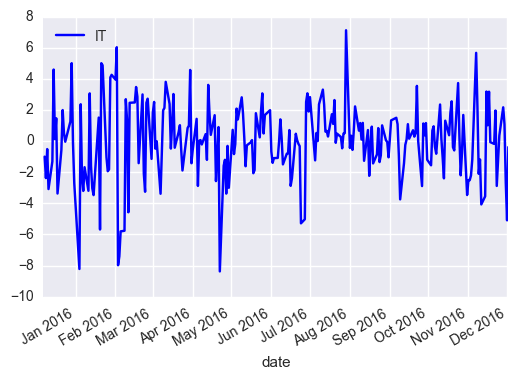

In [24]:
data_IT.Mean.diff(periods=1).plot(color='b',label='IT')
plt.legend(loc='upper left')
plt.show()

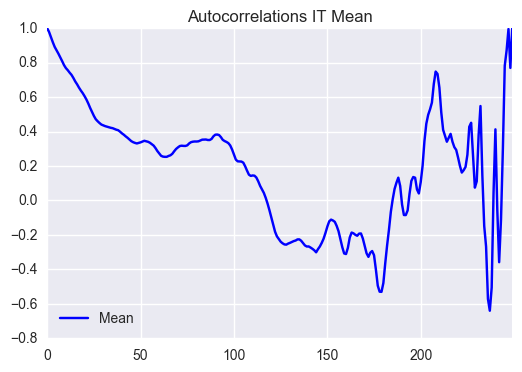

In [25]:
func_auto(data_IT[['Mean']]).plot(color='b')
plt.title('Autocorrelations IT Mean')
plt.show()

#### Correlations between different stocks over time

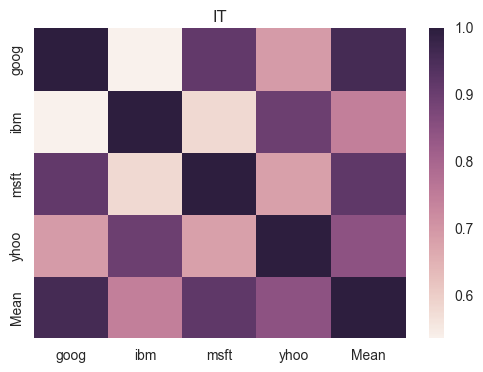

In [26]:
sns.heatmap(data_IT.corr())
plt.title('IT')
plt.show()

In [27]:
data_m['IT'] = data_IT.Mean

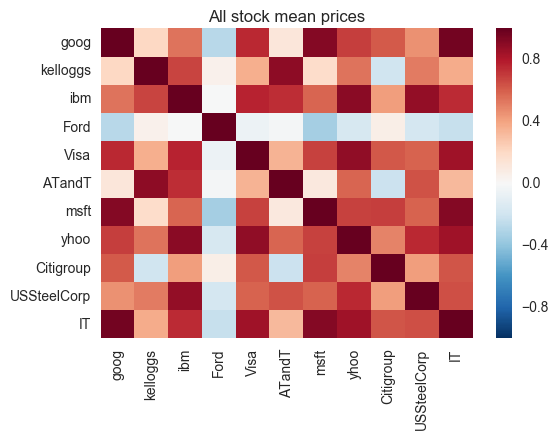

In [28]:
sns.heatmap(data_m.corr())
plt.title('All stock mean prices')
plt.show()

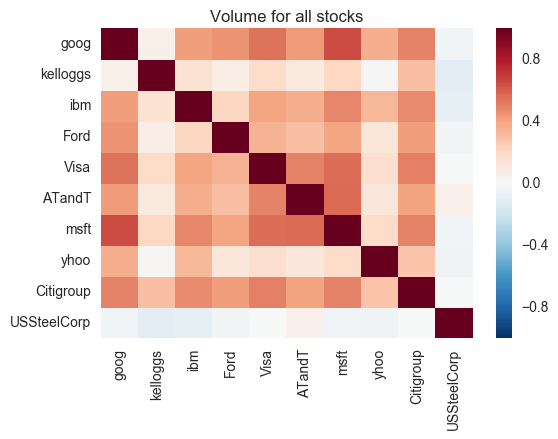

In [29]:
sns.heatmap(data_V.corr())
plt.title('Volume for all stocks')
plt.show()